## File information

File: Final_Project.ipynb

Name: Amie Davis

Date: 2/27/2020

Course: DSC530 - Data Exploration and Analysis

Assignment: 12.2 Term Project

Purpose: Evaluate the Storm Events Database to assist in determining if storms are becoing more intense. 

Usage: Python 3.7.4

Developed using Jupter Notebook 6.0.1

## This file contains code for use with Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


Additional References:
    
    Using Lamba Function with Pandas
    https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7
    
    Joining Pandas dataframes
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

In [1]:
# Import Packages used
import os, csv
import thinkstats2
import thinkplot
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import warnings

In [2]:
# Supress warnings in output
warnings.simplefilter('ignore')

In [3]:
# Function load_file()
#
# Description:  Opens csv file for read and loads into a pandas data frame.
#
# Parameters:   file_name: name of csv file to open
#
# Returns: pandas Dataframe
#
def load_file(file_name):

    # Set data directory
    data_dir = 'C:\\Users\\amomu\\DSC530Winter2019\\Final_Project\\Data\\CSV Files\\'
    filepath = data_dir + file_name
    print(filepath)

    try:
        data_file = open(filepath, 'r', encoding='UTF8')
    except:
        print('File cannot be opened.')
        exit()

    # Load into pandas data frame
    df = pd.read_csv(data_file)
    
    return df

In [4]:
# Function clean_detail()
#
# Description:  Edits damage fields in dataframe to convert to numeric
#
# Parameters:   df: name of dataframe
#
# Returns: pandas dataframe
#
def clean_detail(df):
    
    # Function to correct damage values
    def fix_dmg_value(dmg_value):
        if 'K' in dmg_value:
            new_dmg_value = dmg_value.replace('K', '')
            new_dmg_value = float(new_dmg_value) * 1000
            return new_dmg_value
        elif 'M' in dmg_value:
            new_dmg_value = dmg_value.replace('M', '')
            new_dmg_value = float(new_dmg_value) * 1000000
            return new_dmg_value
        elif 'B' in dmg_value:
            new_dmg_value = dmg_value.replace('B', '')
            new_dmg_value = float(new_dmg_value) * 1000000000
            return new_dmg_value

    # Corrects Values for Property Damage  
    df['DAMAGE_PROPERTY']=df.apply(lambda x: fix_dmg_value(x['DAMAGE_PROPERTY']) if(pd.notnull(x['DAMAGE_PROPERTY'])) else x['DAMAGE_PROPERTY'],axis=1)

    # Corrects Values for Crop Damage  
    df['DAMAGE_CROPS']=df.apply(lambda x: fix_dmg_value(x['DAMAGE_CROPS']) if(pd.notnull(x['DAMAGE_CROPS'])) else x['DAMAGE_CROPS'],axis=1)
    

In [5]:
# Open data file and load into pandas data frame
# 2019 files
det_2019_df = load_file('StormEvents_details-ftp_v1.0_d2019_c20191116.csv')
loc_2019_df = load_file('StormEvents_locations-ftp_v1.0_d2019_c20191116.csv')

# 1999 files
det_1999_df = load_file('StormEvents_details-ftp_v1.0_d1999_c20190920.csv')
loc_1999_df = load_file('StormEvents_locations-ftp_v1.0_d1999_c20190920.csv')

C:\Users\amomu\DSC530Winter2019\Final_Project\Data\CSV Files\StormEvents_details-ftp_v1.0_d2019_c20191116.csv
C:\Users\amomu\DSC530Winter2019\Final_Project\Data\CSV Files\StormEvents_locations-ftp_v1.0_d2019_c20191116.csv
C:\Users\amomu\DSC530Winter2019\Final_Project\Data\CSV Files\StormEvents_details-ftp_v1.0_d1999_c20190920.csv
C:\Users\amomu\DSC530Winter2019\Final_Project\Data\CSV Files\StormEvents_locations-ftp_v1.0_d1999_c20190920.csv


In [6]:
# Clean 2019 data
clean_detail(det_2019_df)
print(det_2019_df[(det_2019_df.DAMAGE_PROPERTY > 0) & (det_2019_df.DAMAGE_PROPERTY < 100000000)].DAMAGE_PROPERTY)

25        100000.0
31        120000.0
32          1500.0
33           200.0
35         75000.0
           ...    
53702       1000.0
53727    4500000.0
53728    1000000.0
53737      25000.0
53738       5000.0
Name: DAMAGE_PROPERTY, Length: 11357, dtype: float64


In [7]:
# Clean 1999 data

# Manual cleaning steps:
# 1 - Event_id 2412612 had invalid data format used in Crop Damage field.  Corrected manually.
# 2 - Unattached descriptions found at end of file.  Removed.
# 3 - Invalid data in Property Damage field for event_id 199909.  Listed as K instead of 1K.  Corrected manually.
# 4 - Invalid data in Crop Damage field for event_id 199904.  Listed as K instead of 1K.  Corrected manually.

clean_detail(det_1999_df)
print(det_1999_df[(det_1999_df.DAMAGE_PROPERTY.notnull())].DAMAGE_PROPERTY)

101         2000.0
198      2600000.0
255       120000.0
256        10000.0
309         1000.0
           ...    
46761     200000.0
46771     100000.0
46772          0.0
46773          0.0
46811      30000.0
Name: DAMAGE_PROPERTY, Length: 11862, dtype: float64


# Histograms

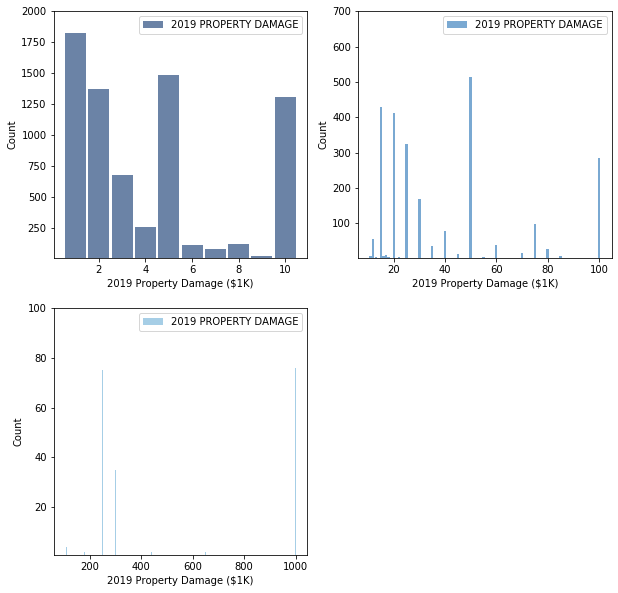

In [8]:
# Histogram for 2019 Property Damage

# It's difficult to see the distribution for Property Damage when viewing the entire data set. 
# For visibility, restricted to various boundaries.
prop_dmg_2019_df = det_2019_df[det_2019_df.DAMAGE_PROPERTY > 0]

# For a viewable histogram, round to the nearest 1000 dollars
prop_dmg_2019_df['DAMAGE_PROPERTY'] = prop_dmg_2019_df.DAMAGE_PROPERTY.divide(1000)
prop_dmg_2019_df['DAMAGE_PROPERTY'] = round(prop_dmg_2019_df.DAMAGE_PROPERTY,0)

# Plot histogram in segments
prop_dmg_2019_df1 = prop_dmg_2019_df[(prop_dmg_2019_df.DAMAGE_PROPERTY > 0) & (prop_dmg_2019_df.DAMAGE_PROPERTY <= 10)]
prop_dmg_2019_df2 = prop_dmg_2019_df[(prop_dmg_2019_df.DAMAGE_PROPERTY > 10) & (prop_dmg_2019_df.DAMAGE_PROPERTY <= 100)]
prop_dmg_2019_df3 = prop_dmg_2019_df[(prop_dmg_2019_df.DAMAGE_PROPERTY > 100) & (prop_dmg_2019_df.DAMAGE_PROPERTY <= 1000)]

hist_2019_prop_dmg = thinkstats2.Hist(prop_dmg_2019_df.DAMAGE_PROPERTY, label='2019 PROPERTY DAMAGE')
hist_2019_prop_dmg1 = thinkstats2.Hist(prop_dmg_2019_df1.DAMAGE_PROPERTY, label='2019 PROPERTY DAMAGE')
hist_2019_prop_dmg2 = thinkstats2.Hist(prop_dmg_2019_df2.DAMAGE_PROPERTY, label='2019 PROPERTY DAMAGE')
hist_2019_prop_dmg3 = thinkstats2.Hist(prop_dmg_2019_df3.DAMAGE_PROPERTY, label='2019 PROPERTY DAMAGE')

thinkplot.PrePlot(4, cols=2, rows=2)
thinkplot.Hist(hist_2019_prop_dmg1)
thinkplot.Config(xlabel='2019 Property Damage ($1K)', ylabel='Count', ylim=(1,2000))

thinkplot.SubPlot(2)
thinkplot.Hist(hist_2019_prop_dmg2)
thinkplot.Config(xlabel='2019 Property Damage ($1K)', ylabel='Count', ylim=(1,700))

thinkplot.SubPlot(3)
thinkplot.Hist(hist_2019_prop_dmg3)
thinkplot.Config(xlabel='2019 Property Damage ($1K)', ylabel='Count', ylim=(1,100))

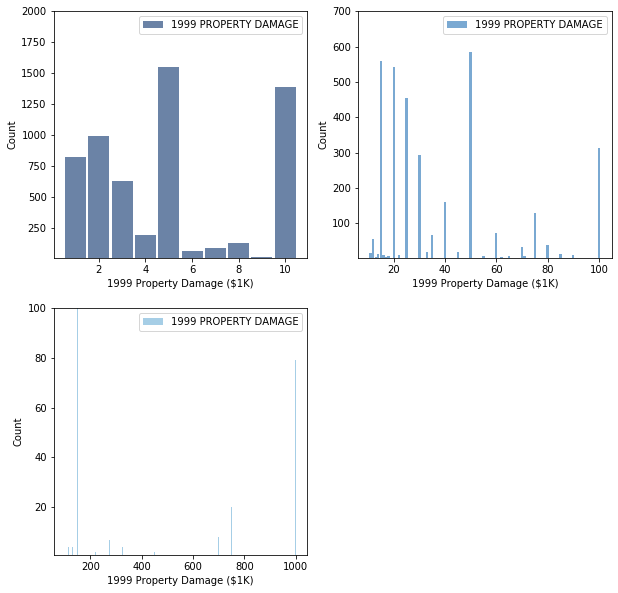

In [9]:
# Histogram for 1999 Property Damage

# It's difficult to see the distribution for Property Damage when viewing the entire data set. 
# For visibility, restricted to various boundaries.
prop_dmg_1999_df = det_1999_df[det_1999_df.DAMAGE_PROPERTY > 0]

# For a viewable histogram, round to the nearest 1000 dollars
prop_dmg_1999_df['DAMAGE_PROPERTY'] = prop_dmg_1999_df.DAMAGE_PROPERTY.divide(1000)
prop_dmg_1999_df['DAMAGE_PROPERTY'] = round(prop_dmg_1999_df.DAMAGE_PROPERTY,0)

# Plot histogram in segments
prop_dmg_1999_df1 = prop_dmg_1999_df[(prop_dmg_1999_df.DAMAGE_PROPERTY > 0) & (prop_dmg_1999_df.DAMAGE_PROPERTY <= 10)]
prop_dmg_1999_df2 = prop_dmg_1999_df[(prop_dmg_1999_df.DAMAGE_PROPERTY > 10) & (prop_dmg_1999_df.DAMAGE_PROPERTY <= 100)]
prop_dmg_1999_df3 = prop_dmg_1999_df[(prop_dmg_1999_df.DAMAGE_PROPERTY > 100) & (prop_dmg_1999_df.DAMAGE_PROPERTY <= 1000)]

hist_1999_prop_dmg = thinkstats2.Hist(prop_dmg_1999_df.DAMAGE_PROPERTY, label='1999 PROPERTY DAMAGE')
hist_1999_prop_dmg1 = thinkstats2.Hist(prop_dmg_1999_df1.DAMAGE_PROPERTY, label='1999 PROPERTY DAMAGE')
hist_1999_prop_dmg2 = thinkstats2.Hist(prop_dmg_1999_df2.DAMAGE_PROPERTY, label='1999 PROPERTY DAMAGE')
hist_1999_prop_dmg3 = thinkstats2.Hist(prop_dmg_1999_df3.DAMAGE_PROPERTY, label='1999 PROPERTY DAMAGE')

thinkplot.PrePlot(4, cols=2, rows=2)
thinkplot.Hist(hist_1999_prop_dmg1)
thinkplot.Config(xlabel='1999 Property Damage ($1K)', ylabel='Count', ylim=(1,2000))

thinkplot.SubPlot(2)
thinkplot.Hist(hist_1999_prop_dmg2)
thinkplot.Config(xlabel='1999 Property Damage ($1K)', ylabel='Count', ylim=(1,700))

thinkplot.SubPlot(3)
thinkplot.Hist(hist_1999_prop_dmg3)
thinkplot.Config(xlabel='1999 Property Damage ($1K)', ylabel='Count', ylim=(1,100))

In [10]:
# Look for outliers in Property Damage
for DAMAGE_PROPERTY, freq in hist_2019_prop_dmg.Smallest(10):
    print(DAMAGE_PROPERTY, freq)
    
for DAMAGE_PROPERTY, freq in hist_2019_prop_dmg.Largest(10):
    print(DAMAGE_PROPERTY, freq)
    
for DAMAGE_PROPERTY, freq in hist_1999_prop_dmg.Smallest(10):
    print(DAMAGE_PROPERTY, freq)
    
for DAMAGE_PROPERTY, freq in hist_1999_prop_dmg.Largest(10):
    print(DAMAGE_PROPERTY, freq)

0.0 740
1.0 1824
2.0 1368
3.0 675
4.0 255
5.0 1481
6.0 110
7.0 77
8.0 119
9.0 20
500000.0 1
420000.0 1
100000.0 1
95000.0 1
70000.0 1
64000.0 1
52300.0 1
50000.0 2
36000.0 1
32500.0 1
0.0 781
1.0 823
2.0 994
3.0 626
4.0 192
5.0 1548
6.0 61
7.0 87
8.0 125
9.0 10
3000000.0 1
450000.0 2
358000.0 1
200000.0 1
170000.0 1
150000.0 1
140000.0 2
125000.0 1
100000.0 1
90000.0 1


All values in smallest and largest are feasible (10 to 3B).
I have excluded values of zero.  Also, the $3 billion dollars from 1999 is an extreme outlier and is skewing results.  I am removing this value from further analysis.

Note that it's difficult to see the distribution for Property Damage when viewing the entire data set.  The histogram is not very useful.  This may be a good candidate for plotting the PMF.

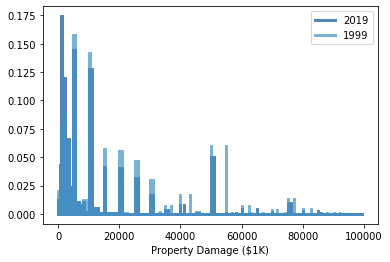

In [11]:
# Pmf for Property Damage
prop_dmg_2019_df = det_2019_df[det_2019_df.DAMAGE_PROPERTY > 0]

# For better visibility, show data to the nearest 1000 dollars
prop_dmg_2019_df['DAMAGE_PROPERTY'] = prop_dmg_2019_df.DAMAGE_PROPERTY.divide(1000)
prop_dmg_2019_df['DAMAGE_PROPERTY'] = round(prop_dmg_2019_df.DAMAGE_PROPERTY,0)
prop_dmg_1999_df['DAMAGE_PROPERTY'] = prop_dmg_1999_df.DAMAGE_PROPERTY.divide(1000)
prop_dmg_1999_df['DAMAGE_PROPERTY'] = round(prop_dmg_1999_df.DAMAGE_PROPERTY,0)

# Exclude outliers from PMF >= $100,000,000
prop_dmg_2019_df = det_2019_df[(det_2019_df.DAMAGE_PROPERTY > 0) & (det_2019_df.DAMAGE_PROPERTY < 100000)]
prop_dmg_1999_df = det_1999_df[(det_1999_df.DAMAGE_PROPERTY > 0) & (det_1999_df.DAMAGE_PROPERTY < 100000)]

prop_dmg_2019_pmf = thinkstats2.Pmf(prop_dmg_2019_df.DAMAGE_PROPERTY, label='2019')
prop_dmg_1999_pmf = thinkstats2.Pmf(prop_dmg_1999_df.DAMAGE_PROPERTY, label='1999')

thinkplot.PrePlot(2)
thinkplot.Pmfs([prop_dmg_2019_pmf, prop_dmg_1999_pmf])
thinkplot.Config(xlabel='Property Damage ($1K)')

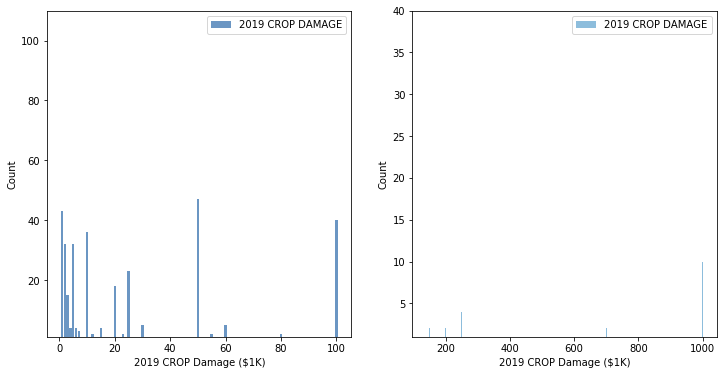

In [12]:
# Histograms for 2019 Crop Damage

# It's difficult to see the distribution for CROP Damage when viewing the entire data set. 
# For visibility, restricted to various boundaries.
crop_dmg_2019_df = det_2019_df[det_2019_df.DAMAGE_CROPS > 0]

# For a viewable histogram, round to the nearest 1000 dollars
crop_dmg_2019_df['DAMAGE_CROPS'] = crop_dmg_2019_df.DAMAGE_CROPS.divide(1000)
crop_dmg_2019_df['DAMAGE_CROPS'] = round(crop_dmg_2019_df.DAMAGE_CROPS,0)

# Plot histogram in segments
crop_dmg_2019_df1 = crop_dmg_2019_df[(crop_dmg_2019_df.DAMAGE_CROPS > 0) & (crop_dmg_2019_df.DAMAGE_CROPS <= 100)]
crop_dmg_2019_df2 = crop_dmg_2019_df[(crop_dmg_2019_df.DAMAGE_CROPS > 100) & (crop_dmg_2019_df.DAMAGE_CROPS <= 1000)]

hist_2019_crop_dmg = thinkstats2.Hist(crop_dmg_2019_df.DAMAGE_CROPS, label='2019 CROP DAMAGE')
hist_2019_crop_dmg1 = thinkstats2.Hist(crop_dmg_2019_df1.DAMAGE_CROPS, label='2019 CROP DAMAGE')
hist_2019_crop_dmg2 = thinkstats2.Hist(crop_dmg_2019_df2.DAMAGE_CROPS, label='2019 CROP DAMAGE')

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(hist_2019_crop_dmg1)
thinkplot.Config(xlabel='2019 CROP Damage ($1K)', ylabel='Count', ylim=(1,110))

thinkplot.SubPlot(2)
thinkplot.Hist(hist_2019_crop_dmg2)
thinkplot.Config(xlabel='2019 CROP Damage ($1K)', ylabel='Count', ylim=(1,40))

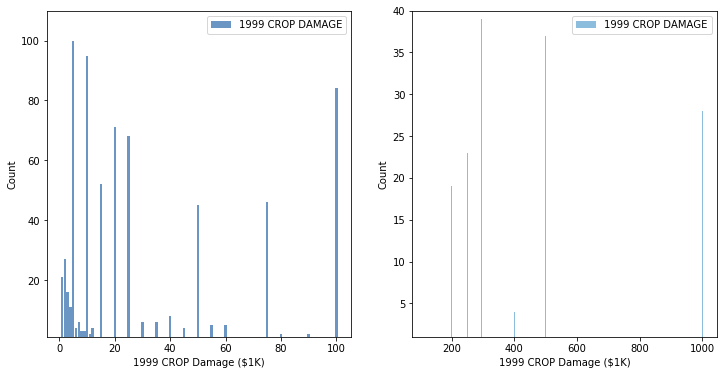

In [13]:
# Histograms for 1999 Crop Damage

# It's difficult to see the distribution for CROP Damage when viewing the entire data set. 
# For visibility, restricted to various boundaries.
crop_dmg_1999_df = det_1999_df[det_1999_df.DAMAGE_CROPS > 0]

# For a viewable histogram, round to the nearest 1000 dollars
crop_dmg_1999_df['DAMAGE_CROPS'] = crop_dmg_1999_df.DAMAGE_CROPS.divide(1000)
crop_dmg_1999_df['DAMAGE_CROPS'] = round(crop_dmg_1999_df.DAMAGE_CROPS,0)

# Plot histogram in segments
crop_dmg_1999_df1 = crop_dmg_1999_df[(crop_dmg_1999_df.DAMAGE_CROPS > 0) & (crop_dmg_1999_df.DAMAGE_CROPS <= 100)]
crop_dmg_1999_df2 = crop_dmg_1999_df[(crop_dmg_1999_df.DAMAGE_CROPS > 100) & (crop_dmg_1999_df.DAMAGE_CROPS <= 1000)]

hist_1999_crop_dmg = thinkstats2.Hist(crop_dmg_1999_df.DAMAGE_CROPS, label='1999 CROP DAMAGE')
hist_1999_crop_dmg1 = thinkstats2.Hist(crop_dmg_1999_df1.DAMAGE_CROPS, label='1999 CROP DAMAGE')
hist_1999_crop_dmg2 = thinkstats2.Hist(crop_dmg_1999_df2.DAMAGE_CROPS, label='1999 CROP DAMAGE')

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(hist_1999_crop_dmg1)
thinkplot.Config(xlabel='1999 CROP Damage ($1K)', ylabel='Count', ylim=(1,110))

thinkplot.SubPlot(2)
thinkplot.Hist(hist_1999_crop_dmg2)
thinkplot.Config(xlabel='1999 CROP Damage ($1K)', ylabel='Count', ylim=(1,40))

In [14]:
# Look for outliers in Crop Damage
for DAMAGE_CROPS, freq in hist_2019_crop_dmg.Smallest(10):
    print(DAMAGE_CROPS, freq)
    
for DAMAGE_CROPS, freq in hist_2019_crop_dmg.Largest(10):
    print(DAMAGE_CROPS, freq)
    
for DAMAGE_CROPS, freq in hist_1999_crop_dmg.Smallest(10):
    print(DAMAGE_CROPS, freq)
    
for DAMAGE_CROPS, freq in hist_1999_crop_dmg.Largest(10):
    print(DAMAGE_CROPS, freq)

0.0 168
1.0 43
2.0 32
3.0 15
4.0 4
5.0 32
6.0 4
7.0 3
8.0 1
10.0 36
100000.0 1
15000.0 1
9000.0 1
7000.0 2
5000.0 3
3000.0 1
2000.0 3
1800.0 1
1700.0 1
1000.0 10
0.0 2
1.0 21
2.0 27
3.0 16
4.0 11
5.0 100
6.0 4
7.0 6
8.0 3
9.0 3
500000.0 2
230000.0 1
200000.0 1
160000.0 1
109250.0 1
96000.0 1
75000.0 1
68100.0 1
65000.0 1
50000.0 1


All values in smallest and largest are feasible (10 to 500M).

Note that it's difficult to see the distribution for Crop Damage when viewing the entire data set.  The histogram is not very useful.  This may be a good candidate for plotting the PMF.

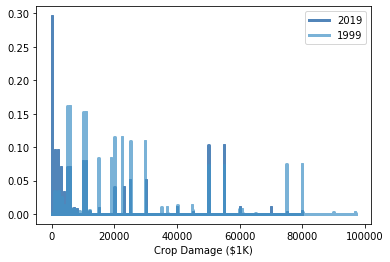

In [15]:
# Pmf for Crop Damage
crop_dmg_2019_df = det_2019_df[det_2019_df.DAMAGE_CROPS > 0]

# For better visibility, show data to the nearest 1000 dollars
crop_dmg_2019_df['DAMAGE_CROPS'] = crop_dmg_2019_df.DAMAGE_CROPS.divide(1000)
crop_dmg_2019_df['DAMAGE_CROPS'] = round(crop_dmg_2019_df.DAMAGE_CROPS,0)
crop_dmg_1999_df['DAMAGE_CROPS'] = crop_dmg_1999_df.DAMAGE_CROPS.divide(1000)
crop_dmg_1999_df['DAMAGE_CROPS'] = round(crop_dmg_1999_df.DAMAGE_CROPS,0)

# Exclude outliers from PMF >= $100,000,000
crop_dmg_2019_df = det_2019_df[(det_2019_df.DAMAGE_CROPS > 0) & (det_2019_df.DAMAGE_CROPS < 100000)]
crop_dmg_1999_df = det_1999_df[(det_1999_df.DAMAGE_CROPS > 0) & (det_1999_df.DAMAGE_CROPS < 100000)]


crop_dmg_2019_pmf = thinkstats2.Pmf(crop_dmg_2019_df.DAMAGE_CROPS, label='2019')
crop_dmg_1999_pmf = thinkstats2.Pmf(crop_dmg_1999_df.DAMAGE_CROPS, label='1999')

thinkplot.PrePlot(2)
thinkplot.Pmfs([crop_dmg_2019_pmf, crop_dmg_1999_pmf])
thinkplot.Config(xlabel='Crop Damage ($1K)')

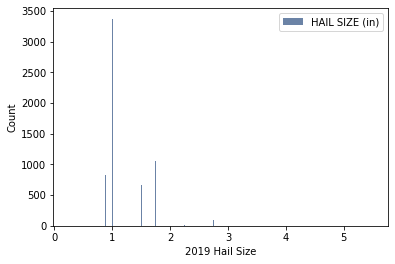

In [16]:
# Histogram for 2019 Hail Size
hail_size_2019_df = det_2019_df[(det_2019_df.MAGNITUDE > 0) & (det_2019_df.MAGNITUDE < 10)]
hist_2019_hail = thinkstats2.Hist(hail_size_2019_df.MAGNITUDE, label='HAIL SIZE (in)')
thinkplot.Hist(hist_2019_hail)
thinkplot.Config(xlabel='2019 Hail Size', ylabel='Count')

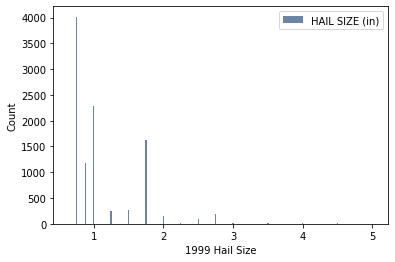

In [17]:
# Histogram for 1999 Hail Size
hail_size_1999_df = det_1999_df[(det_1999_df.MAGNITUDE > 0) & (det_1999_df.MAGNITUDE < 10)]
hist_1999_hail = thinkstats2.Hist(hail_size_1999_df.MAGNITUDE, label='HAIL SIZE (in)')
thinkplot.Hist(hist_1999_hail)
thinkplot.Config(xlabel='1999 Hail Size', ylabel='Count')

In [18]:
# Look for outliers in Hail Size
for MAGNITUDE, freq in hist_2019_hail.Largest(10):
    print(MAGNITUDE, freq)
    
for MAGNITUDE, freq in hist_1999_hail.Largest(10):
    print(MAGNITUDE, freq)

5.5 1
5.0 2
4.5 4
4.25 3
4.0 13
3.5 3
3.4 1
3.23 1
3.2 1
3.0 59
5.0 1
4.75 1
4.5 24
4.0 16
3.75 1
3.5 6
3.0 25
2.75 196
2.5 87
2.25 6


All values are feasible (up to 5.5 inches).  I've had hail up to 3 inches on my deck here near St.Louis.

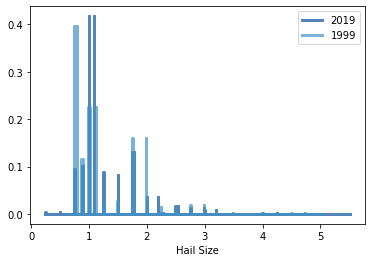

In [19]:
# Pmf for Hail Size
hail_size_2019_df = det_2019_df[(det_2019_df.MAGNITUDE > 0) & (det_2019_df.MAGNITUDE < 10)]
hail_size_1999_df = det_1999_df[(det_1999_df.MAGNITUDE > 0) & (det_1999_df.MAGNITUDE < 10)]

hail_2019_pmf = thinkstats2.Pmf(hail_size_2019_df.MAGNITUDE, label='2019')
hail_1999_pmf = thinkstats2.Pmf(hail_size_1999_df.MAGNITUDE, label='1999')

thinkplot.PrePlot(2)
thinkplot.Pmfs([hail_2019_pmf, hail_1999_pmf])
thinkplot.Config(xlabel='Hail Size')

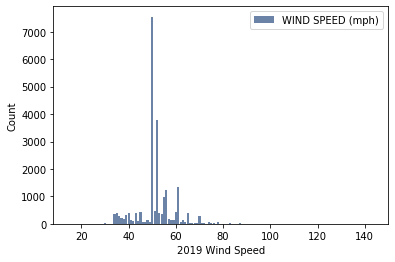

In [20]:
# Histogram for 2019 Wind Speed
wind_speed_2019_df = det_2019_df[det_2019_df.MAGNITUDE > 10]
hist_2019_wind = thinkstats2.Hist(wind_speed_2019_df.MAGNITUDE, label='WIND SPEED (mph)')
thinkplot.Hist(hist_2019_wind)
thinkplot.Config(xlabel='2019 Wind Speed', ylabel='Count')

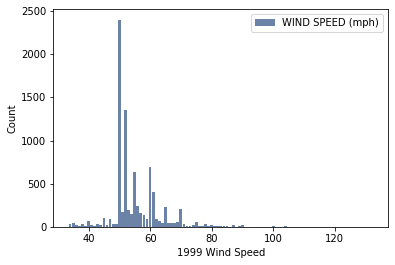

In [21]:
# Histogram for 1999 Wind Speed
wind_speed_1999_df = det_1999_df[det_1999_df.MAGNITUDE > 10]
hist_1999_wind = thinkstats2.Hist(wind_speed_1999_df.MAGNITUDE, label='WIND SPEED (mph)')
thinkplot.Hist(hist_1999_wind)
thinkplot.Config(xlabel='1999 Wind Speed', ylabel='Count')

In [22]:
# Look for outliers in Wind Speed
for MAGNITUDE, freq in hist_2019_wind.Largest(10):
    print(MAGNITUDE, freq)
    
for MAGNITUDE, freq in hist_1999_wind.Largest(10):
    print(MAGNITUDE, freq)

143.0 1
140.0 1
120.0 2
109.0 1
106.0 1
100.0 1
99.0 2
96.0 5
94.0 2
93.0 3
132.0 1
130.0 1
120.0 1
110.0 1
109.0 1
108.0 1
106.0 2
104.0 4
103.0 1
101.0 1


All values are feasible, up to 143 mph, which are Category Four hurricane-level winds.

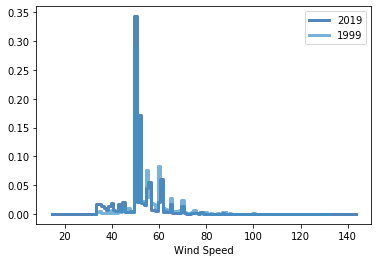

In [23]:
# Pmf for Wind Speed
wind_speed_2019_df = det_2019_df[det_2019_df.MAGNITUDE > 10]
wind_speed_1999_df = det_1999_df[det_1999_df.MAGNITUDE > 10]

wind_2019_pmf = thinkstats2.Pmf(wind_speed_2019_df.MAGNITUDE, label='2019')
wind_1999_pmf = thinkstats2.Pmf(wind_speed_1999_df.MAGNITUDE, label='1999')

thinkplot.PrePlot(2)
thinkplot.Pmfs([wind_2019_pmf, wind_1999_pmf])
thinkplot.Config(xlabel='Wind Speed')

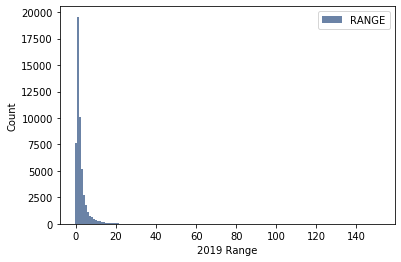

In [24]:
# Histogram for 2019 Range
range_2019_df = loc_2019_df

# Documentation indicates range stores distance to the nearest tenth of a mile
# 2019 data reflects nearest hundreds, while 1999 data appears to be already be rouded to the nearest whole number.
# Round to the nearest whole number to better compare with 1999
range_2019_df['RANGE'] = round(range_2019_df.RANGE,0)

hist_2019_range = thinkstats2.Hist(range_2019_df.RANGE, label='RANGE')
thinkplot.Hist(hist_2019_range)
thinkplot.Config(xlabel='2019 Range', ylabel='Count')

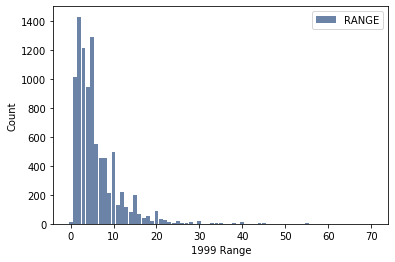

In [25]:
# Histogram for 1999 Range
range_1999_df = loc_1999_df

hist_1999_range = thinkstats2.Hist(range_1999_df.RANGE, label='RANGE')
thinkplot.Hist(hist_1999_range)
thinkplot.Config(xlabel='1999 Range', ylabel='Count')

There are many range values missing in the 1999 dataset, which make it difficult to compare the two histograms.

In [26]:
# Look for outliers in Range
for RANGE, freq in hist_2019_range.Smallest(10):
    print(RANGE, freq)
    
for RANGE, freq in hist_2019_range.Largest(10):
    print(RANGE, freq)

for RANGE, freq in hist_1999_range.Smallest(10):
    print(RANGE, freq)
    
for RANGE, freq in hist_1999_range.Largest(10):
    print(RANGE, freq)

0.0 7679
1.0 19570
2.0 10113
3.0 5176
4.0 2730
5.0 1768
6.0 1106
7.0 742
8.0 600
9.0 421
151.0 1
141.0 1
128.0 1
114.0 2
113.0 2
112.0 2
111.0 1
106.0 3
105.0 2
100.0 4
0.0 12
1.0 1012
2.0 1428
3.0 1215
4.0 940
5.0 1290
6.0 552
7.0 455
8.0 456
9.0 211
70.0 2
60.0 1
55.0 3
50.0 2
48.0 2
47.0 1
45.0 6
44.0 3
43.0 1
42.0 1


All values greater than zero are feasible (0 to 150 miles).

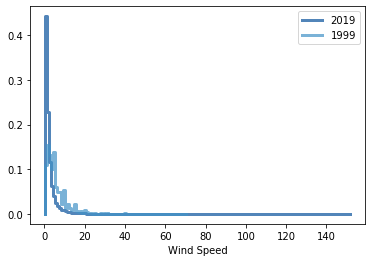

In [27]:
# Pmf for Range
range_2019_df = loc_2019_df[loc_2019_df.RANGE > 0]
range_1999_df = loc_1999_df[loc_1999_df.RANGE > 0]

range_2019_pmf = thinkstats2.Pmf(range_2019_df.RANGE, label='2019')
range_1999_pmf = thinkstats2.Pmf(range_1999_df.RANGE, label='1999')

thinkplot.PrePlot(2)
thinkplot.Pmfs([range_2019_pmf, range_1999_pmf])
thinkplot.Config(xlabel='Wind Speed')

# Summary Statistics

In [28]:
# Compute summary statistics for a series

# Property Damage
prop_dmg_2019_df = det_2019_df[det_2019_df.DAMAGE_PROPERTY > 0]
prop_dmg_1999_df = det_1999_df[det_1999_df.DAMAGE_PROPERTY > 0]

# Round to the nearest 1000 dollars
prop_dmg_2019_df['DAMAGE_PROPERTY'] = prop_dmg_2019_df.DAMAGE_PROPERTY.divide(1000)
prop_dmg_2019_df['DAMAGE_PROPERTY'] = round(prop_dmg_2019_df.DAMAGE_PROPERTY,0)
prop_dmg_1999_df['DAMAGE_PROPERTY'] = prop_dmg_1999_df.DAMAGE_PROPERTY.divide(1000)
prop_dmg_1999_df['DAMAGE_PROPERTY'] = round(prop_dmg_1999_df.DAMAGE_PROPERTY,0)

# Exclude extreme outliers >= $3 billion
prop_dmg_2019_df = prop_dmg_2019_df[(prop_dmg_2019_df.DAMAGE_PROPERTY > 0) & (prop_dmg_2019_df.DAMAGE_PROPERTY < 3000000)]
prop_dmg_1999_df = prop_dmg_1999_df[(prop_dmg_1999_df.DAMAGE_PROPERTY > 0) & (prop_dmg_1999_df.DAMAGE_PROPERTY < 3000000)]

print('Summary Statistics for Property Damage')
prop_dmg_2019_mean = prop_dmg_2019_df.DAMAGE_PROPERTY.mean()
prop_dmg_2019_mode = prop_dmg_2019_df.DAMAGE_PROPERTY.mode()
prop_dmg_2019_var = prop_dmg_2019_df.DAMAGE_PROPERTY.var()
prop_dmg_2019_std = prop_dmg_2019_df.DAMAGE_PROPERTY.std()
prop_dmg_1999_mean = prop_dmg_1999_df.DAMAGE_PROPERTY.mean()
prop_dmg_1999_mode = prop_dmg_1999_df.DAMAGE_PROPERTY.mode()
prop_dmg_1999_var = prop_dmg_1999_df.DAMAGE_PROPERTY.var()
prop_dmg_1999_std = prop_dmg_1999_df.DAMAGE_PROPERTY.std()

print('2019: Mean={}, Variance={}, Standard Deviaton={}'.format(
    round(prop_dmg_2019_mean,2), round(prop_dmg_2019_var,2), round(prop_dmg_2019_std,2)))
print('2019: Mode: {}, '.format(prop_dmg_2019_mode))
print('1999: Mean={}, Variance={}, Standard Deviaton={}'.format(
    round(prop_dmg_1999_mean,2), round(prop_dmg_1999_var,2), round(prop_dmg_1999_std,2)))
print('1999: Mode: {}, '.format(prop_dmg_1999_mode))
    
# Crop Damage
crop_dmg_2019_df = det_2019_df[det_2019_df.DAMAGE_CROPS > 0]
crop_dmg_1999_df = det_1999_df[det_1999_df.DAMAGE_CROPS > 0]

# Round to the nearest 1000 dollars
crop_dmg_2019_df['DAMAGE_CROPS'] = crop_dmg_2019_df.DAMAGE_CROPS.divide(1000)
crop_dmg_2019_df['DAMAGE_CROPS'] = round(crop_dmg_2019_df.DAMAGE_CROPS,0)
crop_dmg_1999_df['DAMAGE_CROPS'] = crop_dmg_1999_df.DAMAGE_CROPS.divide(1000)
crop_dmg_1999_df['DAMAGE_CROPS'] = round(crop_dmg_1999_df.DAMAGE_CROPS,0)

# Exclude extreme records with damage rounded to 0
crop_dmg_2019_df = crop_dmg_2019_df[crop_dmg_2019_df.DAMAGE_CROPS > 0]
crop_dmg_1999_df = crop_dmg_1999_df[crop_dmg_1999_df.DAMAGE_CROPS > 0]

print()
print('Summary Statistics for Crop Damage')
crop_dmg_2019_mean = crop_dmg_2019_df.DAMAGE_CROPS.mean()
crop_dmg_2019_mode = crop_dmg_2019_df.DAMAGE_CROPS.mode()
crop_dmg_2019_var = crop_dmg_2019_df.DAMAGE_CROPS.var()
crop_dmg_2019_std = crop_dmg_2019_df.DAMAGE_CROPS.std()
crop_dmg_1999_mean = crop_dmg_1999_df.DAMAGE_CROPS.mean()
crop_dmg_1999_mode = crop_dmg_1999_df.DAMAGE_CROPS.mode()
crop_dmg_1999_var = crop_dmg_1999_df.DAMAGE_CROPS.var()
crop_dmg_1999_std = crop_dmg_1999_df.DAMAGE_CROPS.std()

print('2019: Mean={}, Variance={}, Standard Deviaton={}'.format(
    round(crop_dmg_2019_mean,2), round(crop_dmg_2019_var,2), round(crop_dmg_2019_std,2)))
print('2019: Mode: {}, '.format(crop_dmg_2019_mode))
print('1999: Mean={}, Variance={}, Standard Deviaton={}'.format(
    round(crop_dmg_1999_mean,2), round(crop_dmg_1999_var,2), round(crop_dmg_1999_std,2)))
print('2019: Mode: {}, '.format(crop_dmg_2019_mode))

# Hail Size
print()
print('Summary Statistics for Hail Size')
hail_size_2019_mean = hail_size_2019_df.MAGNITUDE.mean()
hail_size_2019_mode = hail_size_2019_df.MAGNITUDE.mode()
hail_size_2019_var = hail_size_2019_df.MAGNITUDE.var()
hail_size_2019_std = hail_size_2019_df.MAGNITUDE.std()
hail_size_1999_mean = hail_size_1999_df.MAGNITUDE.mean()
hail_size_1999_mode = hail_size_1999_df.MAGNITUDE.mode()
hail_size_1999_var = hail_size_1999_df.MAGNITUDE.var()
hail_size_1999_std = hail_size_1999_df.MAGNITUDE.std()

print('2019: Mean={}, Variance={}, Standard Deviaton={}'.format(
    round(hail_size_2019_mean,2), round(hail_size_2019_var,2), round(hail_size_2019_std,2)))
print('2019: Mode: {}, '.format(hail_size_2019_mode))
print('1999: Mean={}, Variance={}, Standard Deviaton={}'.format(
    round(hail_size_1999_mean,2), round(hail_size_1999_var,2), round(hail_size_1999_std,2)))
print('1999: Mode: {}, '.format(hail_size_1999_mode))

# Wind Speed
print()
print('Summary Statistics for Wind Speed')
wind_speed_2019_mean = wind_speed_2019_df.MAGNITUDE.mean()
wind_speed_2019_mode = wind_speed_2019_df.MAGNITUDE.mode()
wind_speed_2019_var = wind_speed_2019_df.MAGNITUDE.var()
wind_speed_2019_std = wind_speed_2019_df.MAGNITUDE.std()
wind_speed_1999_mean = wind_speed_1999_df.MAGNITUDE.mean()
wind_speed_1999_mode = wind_speed_1999_df.MAGNITUDE.mode()
wind_speed_1999_var = wind_speed_1999_df.MAGNITUDE.var()
wind_speed_1999_std = wind_speed_1999_df.MAGNITUDE.std()

print('2019: Mean={}, Variance={}, Standard Deviaton={}'.format(
    round(wind_speed_2019_mean,2), round(wind_speed_2019_var,2), round(wind_speed_2019_std,2)))
print('2019: Mode: {}, '.format(wind_speed_2019_mode))
print('1999: Mean={}, Variance={}, Standard Deviaton={}'.format(
    round(wind_speed_1999_mean,2), round(wind_speed_1999_var,2), round(wind_speed_1999_std,2)))
print('1999: Mode: {}, '.format(wind_speed_1999_mode))

# Range
print()
print('Summary Statistics for Range')
range_2019_mean = range_2019_df.RANGE.mean()
range_2019_mode = range_2019_df.RANGE.mode()
range_2019_var = range_2019_df.RANGE.var()
range_2019_std = range_2019_df.RANGE.std()
range_1999_mean = range_1999_df.RANGE.mean()
range_1999_mode = range_1999_df.RANGE.mode()
range_1999_var = range_1999_df.RANGE.var()
range_1999_std = range_1999_df.RANGE.std()

print('2019: Mean={}, Variance={}, Standard Deviaton={}'.format(
    round(range_2019_mean,2), round(range_2019_var,2), round(range_2019_std,2)))
print('2019: Mode: {}, '.format(range_2019_mode))
print('1999: Mean={}, Variance={}, Standard Deviaton={}'.format(
    round(range_1999_mean,2), round(range_1999_var,2), round(range_1999_std,2)))
print('1999: Mode: {}, '.format(range_1999_mode))

Summary Statistics for Property Damage
2019: Mean=268.69, Variance=44775204.36, Standard Deviaton=6691.43
2019: Mode: 0    1.0
dtype: float64, 
1999: Mean=540.65, Variance=74101354.0, Standard Deviaton=8608.21
1999: Mode: 0    5.0
dtype: float64, 

Summary Statistics for Crop Damage
2019: Mean=516.7, Variance=26719670.17, Standard Deviaton=5169.11
2019: Mode: 0    50.0
dtype: float64, 
1999: Mean=3193.15, Variance=600362573.09, Standard Deviaton=24502.3
2019: Mode: 0    50.0
dtype: float64, 

Summary Statistics for Hail Size
2019: Mean=1.23, Variance=0.24, Standard Deviaton=0.49
2019: Mode: 0    1.0
dtype: float64, 
1999: Mean=1.11, Variance=0.27, Standard Deviaton=0.52
1999: Mode: 0    0.75
dtype: float64, 

Summary Statistics for Wind Speed
2019: Mean=51.54, Variance=58.56, Standard Deviaton=7.65
2019: Mode: 0    50.0
dtype: float64, 
1999: Mean=55.11, Variance=70.62, Standard Deviaton=8.4
1999: Mode: 0    50.0
dtype: float64, 

Summary Statistics for Range
2019: Mean=3.0, Variance=2

## Compare two scenarios in your data using a PMF.  Same variable, but a different scenario, like a filter.

Define two groups of data: storms with high winds and storms without high winds.  Define high winds as greater than 50mph (NWS).

In [29]:
# Define two groups of data: storms with high winds and storms without high winds
# Define high winds as greater than 50mph (NWS)
wind_speed_2019_df = det_2019_df[det_2019_df.MAGNITUDE > 10]
    
high_winds_df = wind_speed_2019_df[wind_speed_2019_df.MAGNITUDE > 50]
low_winds_df = wind_speed_2019_df[wind_speed_2019_df.MAGNITUDE <= 50]

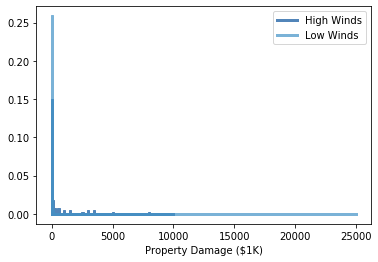

In [30]:
# Pmf for Property Damage for Storms w/ low and high winds

# Exclude extreme outliers >= $100,000,000
high_winds_df = high_winds_df[(high_winds_df.DAMAGE_PROPERTY > 0) & (high_winds_df.DAMAGE_PROPERTY < 100000000)]
high_winds_df['DAMAGE_PROPERTY'] = high_winds_df.DAMAGE_PROPERTY.divide(1000)
high_winds_df['DAMAGE_PROPERTY'] = round(high_winds_df.DAMAGE_PROPERTY,0)

low_winds_df = low_winds_df[(low_winds_df.DAMAGE_PROPERTY > 0) & (low_winds_df.DAMAGE_PROPERTY < 100000000)]
low_winds_df['DAMAGE_PROPERTY'] = low_winds_df.DAMAGE_PROPERTY.divide(1000)
low_winds_df['DAMAGE_PROPERTY'] = round(low_winds_df.DAMAGE_PROPERTY,0)

high_winds_pmf = thinkstats2.Pmf(high_winds_df.DAMAGE_PROPERTY, label='High Winds')
low_winds_pmf = thinkstats2.Pmf(low_winds_df.DAMAGE_PROPERTY, label='Low Winds')

thinkplot.PrePlot(2)
thinkplot.Pmfs([high_winds_pmf, low_winds_pmf])
thinkplot.Config(xlabel='Property Damage ($1K)')

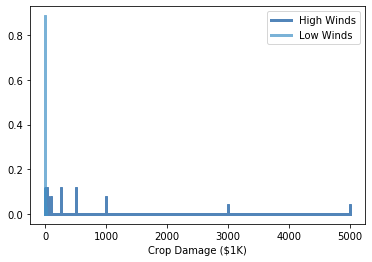

In [31]:
# Pmf for Storms w/ low and high winds

# Exclude extreme outliers >= $100,000,000
high_winds_df = high_winds_df[(high_winds_df.DAMAGE_CROPS > 0) & (high_winds_df.DAMAGE_CROPS < 100000000)]
high_winds_df['DAMAGE_CROPS'] = high_winds_df.DAMAGE_CROPS.divide(1000)
high_winds_df['DAMAGE_CROPS'] = round(high_winds_df.DAMAGE_CROPS,0)

low_winds_df = low_winds_df[(low_winds_df.DAMAGE_CROPS > 0) & (low_winds_df.DAMAGE_CROPS < 100000000)]
low_winds_df['DAMAGE_CROPS'] = low_winds_df.DAMAGE_CROPS.divide(1000)
low_winds_df['DAMAGE_CROPS'] = round(low_winds_df.DAMAGE_CROPS,0)

high_winds_pmf = thinkstats2.Pmf(high_winds_df.DAMAGE_CROPS, label='High Winds')
low_winds_pmf = thinkstats2.Pmf(low_winds_df.DAMAGE_CROPS, label='Low Winds')

thinkplot.PrePlot(2)
thinkplot.Pmfs([high_winds_pmf, low_winds_pmf])
thinkplot.Config(xlabel='Crop Damage ($1K)')

# CDFs - Identify Distributions

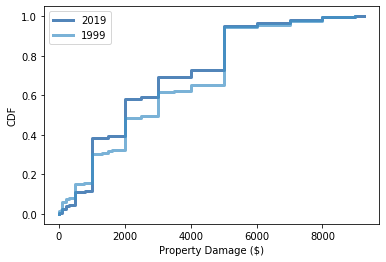

<Figure size 576x432 with 0 Axes>

In [32]:
# CDF for Property Damage

# It's difficult to see the distribution for Property Damage when viewing the entire data set. 
# For visibility, restricted to various boundaries.
prop_dmg_2019_df = det_2019_df[(det_2019_df.DAMAGE_PROPERTY > 0) & (det_2019_df.DAMAGE_PROPERTY < 10000)]
prop_dmg_1999_df = det_1999_df[(det_1999_df.DAMAGE_PROPERTY > 0) & (det_1999_df.DAMAGE_PROPERTY < 10000)]

cdf_2019_prop_dmg = thinkstats2.Cdf(prop_dmg_2019_df.DAMAGE_PROPERTY.dropna(), label='2019')
cdf_1999_prop_dmg = thinkstats2.Cdf(prop_dmg_1999_df.DAMAGE_PROPERTY.dropna(), label='1999')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_2019_prop_dmg, cdf_1999_prop_dmg])
thinkplot.Show(xlabel='Property Damage ($)', ylabel='CDF')

The CDF plot for Property Damage shows a lot of steps, representing a discrete sample.  Use KDE to smooth.

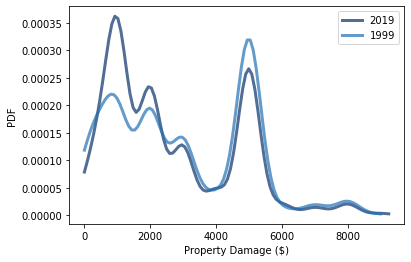

In [33]:
# Estimated PDF for Property Damage
prop_dmg_2019_pdf = thinkstats2.EstimatedPdf(prop_dmg_2019_df.DAMAGE_PROPERTY.dropna(), label='DAMAGE_PROPERTY')
prop_dmg_1999_pdf = thinkstats2.EstimatedPdf(prop_dmg_1999_df.DAMAGE_PROPERTY.dropna(), label='DAMAGE_PROPERTY')

thinkplot.Pdf(prop_dmg_2019_pdf, label='2019')
thinkplot.Pdf(prop_dmg_1999_pdf, label='1999')
thinkplot.Config(xlabel='Property Damage ($)', ylabel='PDF')





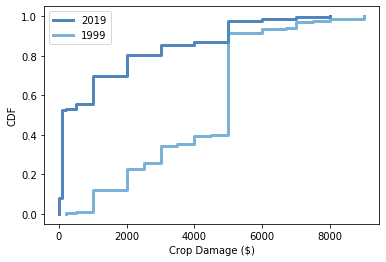

<Figure size 576x432 with 0 Axes>

In [34]:
# CDF for Crop Damage

# It's difficult to see the distribution for Crop Damage when viewing the entire data set. 
# For visibility, restricted to various boundaries.
crop_dmg_2019_df = det_2019_df[(det_2019_df.DAMAGE_CROPS > 0) & (det_2019_df.DAMAGE_CROPS < 10000)]
crop_dmg_1999_df = det_1999_df[(det_1999_df.DAMAGE_CROPS > 0) & (det_1999_df.DAMAGE_CROPS < 10000)]

cdf_2019_crop_dmg = thinkstats2.Cdf(crop_dmg_2019_df.DAMAGE_CROPS.dropna(), label='2019')
cdf_1999_crop_dmg = thinkstats2.Cdf(crop_dmg_1999_df.DAMAGE_CROPS.dropna(), label='1999')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_2019_crop_dmg, cdf_1999_crop_dmg])
thinkplot.Show(xlabel='Crop Damage ($)', ylabel='CDF')

The CDF plot for Crop Damage shows a lot of steps, representing a discrete sample.  Use KDE to smooth.

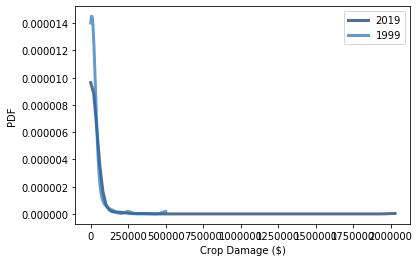

In [35]:
# Estimated PDF for Crop Damage
crop_dmg_2019_pdf = thinkstats2.EstimatedPdf(crop_dmg_2019_df.DAMAGE_PROPERTY.dropna(), label='DAMAGE_CROPS')
crop_dmg_1999_pdf = thinkstats2.EstimatedPdf(crop_dmg_1999_df.DAMAGE_PROPERTY.dropna(), label='DAMAGE_CROPS')

thinkplot.Pdf(crop_dmg_2019_pdf, label='2019')
thinkplot.Pdf(crop_dmg_1999_pdf, label='1999')
thinkplot.Config(xlabel='Crop Damage ($)', ylabel='PDF')

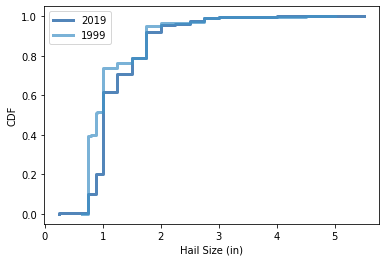

<Figure size 576x432 with 0 Axes>

In [36]:
# CDF for Hail Size
hail_size_2019_df = det_2019_df[(det_2019_df.MAGNITUDE > 0) & (det_2019_df.MAGNITUDE < 10)]
hail_size_1999_df = det_1999_df[(det_1999_df.MAGNITUDE > 0) & (det_1999_df.MAGNITUDE < 10)]

cdf_2019_hail = thinkstats2.Cdf(hail_size_2019_df.MAGNITUDE.dropna(), label='2019')
cdf_1999_hail = thinkstats2.Cdf(hail_size_1999_df.MAGNITUDE.dropna(), label='1999')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_2019_hail, cdf_1999_hail])
thinkplot.Show(xlabel='Hail Size (in)', ylabel='CDF')

The CDF plot for hail size shows a slight sigmid shape, representing a slightly normal distribution.  To verify a normal distribution, use a normal probability plot.

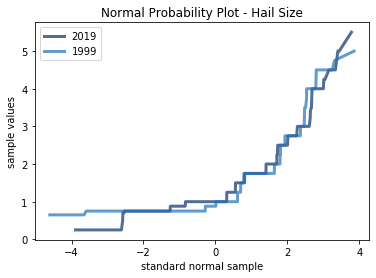

In [37]:
xs, ys = thinkstats2.NormalProbability(hail_size_2019_df.MAGNITUDE)
xs2, ys2 = thinkstats2.NormalProbability(hail_size_1999_df.MAGNITUDE)
thinkplot.Plot(xs, ys, label='2019')
thinkplot.Plot(xs2, ys2, label='1999')
thinkplot.Config(title='Normal Probability Plot - Hail Size',
                 xlabel='standard normal sample',
                 ylabel='sample values')

This is not much of a straight line, so only a slight normal distribution is represented.

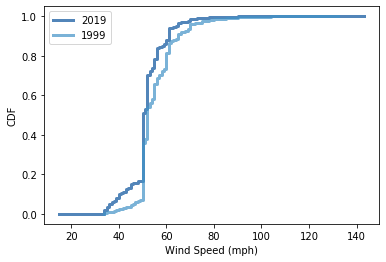

<Figure size 576x432 with 0 Axes>

In [38]:
# CDF for Wind Speed
cdf_2019_wind = thinkstats2.Cdf(wind_speed_2019_df.MAGNITUDE, label='2019')
cdf_1999_wind = thinkstats2.Cdf(wind_speed_1999_df.MAGNITUDE, label='1999')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_2019_wind, cdf_1999_wind])
thinkplot.Show(xlabel='Wind Speed (mph)', ylabel='CDF')

The CDF plot for wind speed shows a better sigmoid shape, representing a normal distribution.  To verify a normal distribution, use a normal probability plot.

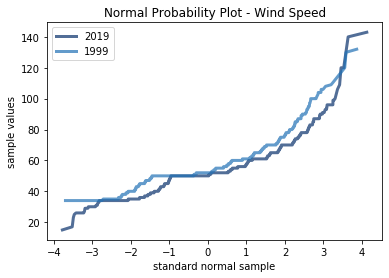

In [39]:
xs, ys = thinkstats2.NormalProbability(wind_speed_2019_df.MAGNITUDE)
xs2, ys2 = thinkstats2.NormalProbability(wind_speed_1999_df.MAGNITUDE)
thinkplot.Plot(xs, ys, label='2019')
thinkplot.Plot(xs2, ys2, label='1999')
thinkplot.Config(title='Normal Probability Plot - Wind Speed',
                 xlabel='standard normal sample',
                 ylabel='sample values')

This isn't much of a straight line, so wind speed is only a slight representation of a normal distribution.

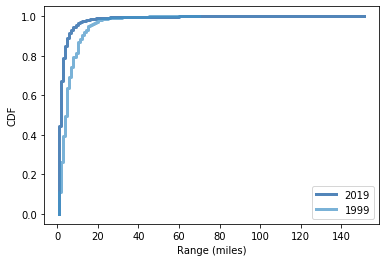

<Figure size 576x432 with 0 Axes>

In [40]:
# CDF for Range
cdf_2019_range = thinkstats2.Cdf(range_2019_df.RANGE, label='2019')
cdf_1999_range = thinkstats2.Cdf(range_1999_df.RANGE, label='1999')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_2019_range, cdf_1999_range])
thinkplot.Show(xlabel='Range (miles)', ylabel='CDF')

The distribution for both years is the same.  The CDF plot for Range appears to show an exponential or Pareto distribution.  To check, plot the CCDF.

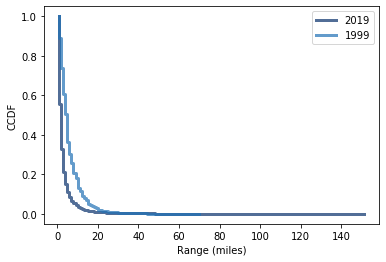

In [41]:
# CCDF for Range
thinkplot.Cdfs([cdf_2019_range, cdf_1999_range], complement=True)
thinkplot.Config(xlabel='Range (miles)', ylabel='CCDF')

This is not much of a straight line, so an exponential distribution is not represented.  Try plotting CCDF as a function of log(range).

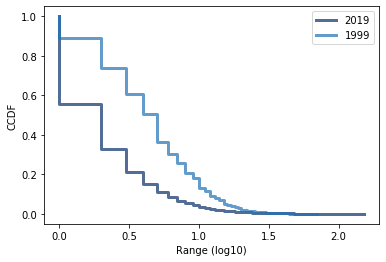

In [42]:
# CCDF for Range as a function of log(range)
cdf_log_range_2019 = thinkstats2.Cdf(np.log10(range_2019_df.RANGE), label='2019')
cdf_log_range_1999 = thinkstats2.Cdf(np.log10(range_1999_df.RANGE), label='1999')

thinkplot.Cdfs([cdf_log_range_2019, cdf_log_range_1999], complement=True)
thinkplot.Config(xlabel='Range (log10)', ylabel='CCDF')

Although the results of plotting the CCDF against the log(range) does not result in a straight line for the 2019 range data, the range from the 1999 dataset is straighter and may representative of a Pareto distribution.

# Scatter Plots - Identify Relationships

In [43]:
# Add derived columns for hail size and wind speed from MAGNITUDE column
# Need to exclude invalid magnitude values <0
det_2019_df['valid_mag'] = np.where(det_2019_df.MAGNITUDE >= 0, det_2019_df['MAGNITUDE'], np.nan)
det_2019_df['hail_size'] = np.where(det_2019_df.valid_mag < 10, det_2019_df['valid_mag'], np.nan)
det_2019_df['wind_speed'] = np.where(det_2019_df.valid_mag > 10, det_2019_df['valid_mag'], np.nan)

# For purposes for visibility, exclude largest damage values
det_2019_df['prop_dmg'] = np.where(det_2019_df['DAMAGE_PROPERTY'] < 50000, det_2019_df['DAMAGE_PROPERTY'], np.nan)
det_2019_df['crop_dmg'] = np.where(det_2019_df['DAMAGE_CROPS'] < 25000, det_2019_df['DAMAGE_CROPS'], np.nan)

# Join data frame to get location data
join_df_2019 = det_2019_df.join(loc_2019_df.set_index('EVENT_ID'), on='EVENT_ID', lsuffix='_det', rsuffix='_loc')

# Set series names
jrange_2019 = join_df_2019.RANGE
jprop_dmg_2019 = join_df_2019.prop_dmg
jcrop_dmg_2019 = join_df_2019.crop_dmg
jhail_size_2019 = join_df_2019.hail_size
jwind_speed_2019 = join_df_2019.wind_speed

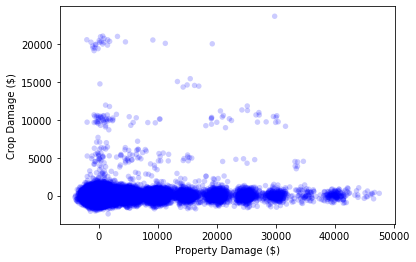

In [44]:
# Property Damage vs. Crop Damage

# Jitter to account for rounding
jit_prop_dmg_2019 = thinkstats2.Jitter(jprop_dmg_2019, 1000)
jit_crop_dmg_2019 = thinkstats2.Jitter(jcrop_dmg_2019, 500)

thinkplot.Scatter(jit_prop_dmg_2019, jit_crop_dmg_2019)
thinkplot.Config(xlabel='Property Damage ($)',
               ylabel='Crop Damage ($)',
               alpha = 0.02,
#               axis=[0, 10000000, 0, 25000000],
               legend=False)

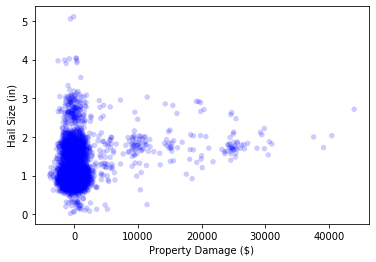

In [45]:
# Property Damage vs. Hail Size

# Jitter to account for rounding
jit_hail_size_2019 = thinkstats2.Jitter(jhail_size_2019, 0.1)

thinkplot.Scatter(jit_prop_dmg_2019, jit_hail_size_2019)
thinkplot.Config(xlabel='Property Damage ($)',
               ylabel='Hail Size (in)',
               alpha = 0.02,
               legend=False)

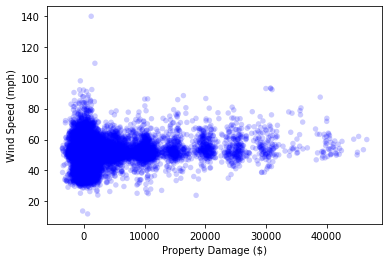

In [46]:
# Property Damage vs. Wind Speed

# Jitter to account for rounding
jit_wind_speed_2019 = thinkstats2.Jitter(jwind_speed_2019, 2)

thinkplot.Scatter(jit_prop_dmg_2019, jit_wind_speed_2019)
thinkplot.Config(xlabel='Property Damage ($)',
               ylabel='Wind Speed (mph)',
               alpha = 0.02,
               legend=False)

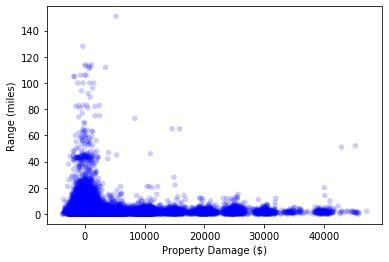

In [47]:
# Property Damage vs. Range

# Jitter to account for rounding
jit_jprop_dmg_2019 = thinkstats2.Jitter(jprop_dmg_2019, 1000)

thinkplot.Scatter(jit_jprop_dmg_2019, jrange_2019)
thinkplot.Config(xlabel='Property Damage ($)',
               ylabel='Range (miles)',
               alpha = 0.02,
               legend=False)

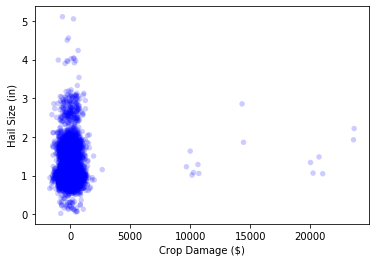

In [48]:
# Crop Damage vs. Hail Size

# Jitter to account for rounding

thinkplot.Scatter(jit_crop_dmg_2019, jit_hail_size_2019)
thinkplot.Config(xlabel='Crop Damage ($)',
               ylabel='Hail Size (in)',
               alpha = 0.02,
               legend=False)

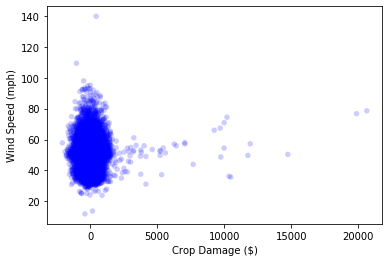

In [49]:
# Crop Damage vs. Wind Speed

# Jitter to account for rounding

thinkplot.Scatter(jit_crop_dmg_2019, jit_wind_speed_2019)
thinkplot.Config(xlabel='Crop Damage ($)',
               ylabel='Wind Speed (mph)',
               alpha = 0.02,
               legend=False)

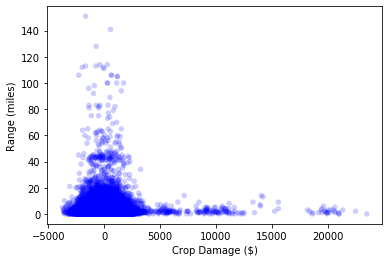

In [50]:
# Crop Damage vs. Range

# Jitter to account for rounding
jit_jcrop_dmg_2019 = thinkstats2.Jitter(jcrop_dmg_2019, 1000)

thinkplot.Scatter(jit_jcrop_dmg_2019, jrange_2019)
thinkplot.Config(xlabel='Crop Damage ($)',
               ylabel='Range (miles)',
               alpha = 0.02,
               legend=False)

Note that Hail Size and Wind Speed share the same data field in the original dataset, so no record has both values and the variables cannot be compared.

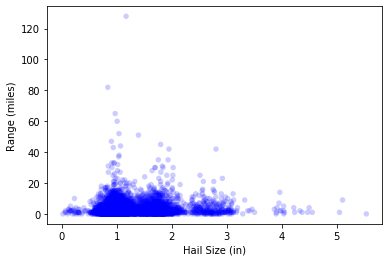

In [51]:
# Hail Size vs. Range

# Jitter to account for rounding

thinkplot.Scatter(jit_hail_size_2019, jrange_2019)
thinkplot.Config(xlabel='Hail Size (in)',
               ylabel='Range (miles)',
               alpha = 0.02,
               legend=False)

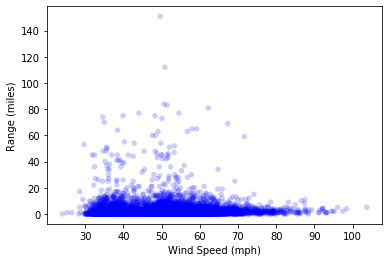

In [52]:
# Wind Speed vs. Range

# Jitter to account for rounding

thinkplot.Scatter(jit_wind_speed_2019, jrange_2019)
thinkplot.Config(xlabel='Wind Speed (mph)',
               ylabel='Range (miles)',
               alpha = 0.02,
               legend=False)

The scatter plots indicate there might be a slight relationship between Wind Speed and Crop Damage, Property Damage and Wind Speed, and Property Damage and Hail Size.

## Check Covariance and Coefficient of Correlation

In [53]:
# Wind Speed and Crop Damage
cleaned = det_2019_df.dropna(subset=['wind_speed', 'crop_dmg'])
wind_speed, crop_dmg = cleaned.wind_speed, cleaned.crop_dmg
print('Covariance for Wind Speed and Crop Damage: {}'.format(thinkstats2.Cov(wind_speed, crop_dmg)))
print('Correlation Coefficient for Wind Speed and Crop Damage: {}'.format(thinkstats2.Corr(wind_speed, crop_dmg)))

# Property Damage and Wind Speed
cleaned = det_2019_df.dropna(subset=['prop_dmg', 'wind_speed'])
prop_dmg, wind_speed = cleaned.prop_dmg, cleaned.wind_speed
print()
print('Covariance for Property Damage and Wind Speed: {}'.format(thinkstats2.Cov(prop_dmg, wind_speed)))
print('Correlation Coefficient for Property Damage and Wind Speed: {}'.format(thinkstats2.Corr(prop_dmg, wind_speed)))

# Property Damage and Hail Size
cleaned = det_2019_df.dropna(subset=['prop_dmg', 'hail_size'])
prop_dmg, hail_size = cleaned.prop_dmg, cleaned.hail_size
print()
print('Covariance for Property Damage and Hail Size: {}'.format(thinkstats2.Cov(prop_dmg, hail_size)))
print('Correlation Coefficeint for Property Damage and Hail Size: {}'.format(thinkstats2.Corr(prop_dmg, hail_size)))

Covariance for Wind Speed and Crop Damage: 19.637786997120457
Correlation Coefficient for Wind Speed and Crop Damage: 0.007219659758596808

Covariance for Property Damage and Wind Speed: 4580.2903010119535
Correlation Coefficient for Property Damage and Wind Speed: 0.11716113605744048

Covariance for Property Damage and Hail Size: 296.47715829526817
Correlation Coefficeint for Property Damage and Hail Size: 0.21471562147959689


All three comparisons show positive correlations.  The correlation coefficients show a minute effect between Wind Speed and Crop Damage, a small effect between Property Damage and Wind Speed, and a medium effect between Property Damage and Hail Size.  The largest relationship among variables in this dataset is between Property Damage and Hail Size.  Statistics from my insurance company would show that my biggest claim was from hail damage in 2014, so this certainly is a feasible correlation.

## Evaluate if the results from the sample would happen in the larger population.
## Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

Define two groups of data: storms with high winds and storms without high winds.  Define high winds as greater than 50mph (NWS).

1) For test statistic, use the difference in means of property damage between the two groups.

2) Null hypothesis: Storms with high winds cause the same damage as all other storms.

3) Compute p-value to see if the null hypothesis is true

4) Interpret Results.

In [54]:
# DiffMeansPermute Class code from Ch 9 of Think Stats
# To compute the p-value of an observed difference in means, assume that there is no difference between the groups and 
# generate simulated results by shuffling the data.

# Class code from Ch 9 of Think Stats
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [55]:
# Function get_propdmg_mean_p()
#
# Description:  Performs Permutation Test on the difference in means of wind speed
#
# Parameters:   sample: Dataframe of sample
#               iters: Number of iterations
#
# Returns: p-value for mean difference
#
def get_propdmg_mean_p(sample, p_iters):

    # Define Data
    # Define two groups of data: storms with high winds and storms without high winds
    # Define high winds as greater than 50mph (NWS)
    high_winds_df = sample[sample.MAGNITUDE > 50]
    low_winds_df = sample[sample.MAGNITUDE <= 50]
    
    # Get counts for each group
    # print(len(high_winds_df))
    # print(len(low_winds_df))
    
    data = (high_winds_df.prop_dmg.dropna().values,
            low_winds_df.prop_dmg.dropna().values)

    # Instantiate Hypothesis Test object  
    ht_mean = DiffMeansPermute(data)
    
    # Find p-value
    p_mean = ht_mean.PValue(iters=p_iters)
    return(p_mean)

In [56]:
# Only include storms with wind speed recorded
wind_speed_2019_df = det_2019_df[det_2019_df.MAGNITUDE > 10]

# Let n represent the full sample size
n = len(wind_speed_2019_df)

# Iterate through random subsets of rows in the DataFrame.
for _ in range(10):
    sample = thinkstats2.SampleRows(wind_speed_2019_df, n)
    
    # Run tests with random subsets
    p_mean = get_propdmg_mean_p(sample, 100)
                    
    print('P-value for sample size of {} is {}.'.format(n, p_mean))
    
    # Reduce n by half each time to decrease sample size
    n //= 2

P-value for sample size of 22001 is 0.0.
P-value for sample size of 11000 is 0.0.
P-value for sample size of 5500 is 0.0.
P-value for sample size of 2750 is 0.0.
P-value for sample size of 1375 is 0.49.
P-value for sample size of 687 is 0.93.
P-value for sample size of 343 is 0.22.
P-value for sample size of 171 is 0.01.
P-value for sample size of 85 is 0.01.
P-value for sample size of 42 is 0.92.


The results show that if we sample 2750 or more events, the effect (high winds impacting property damage) is statistically significant and unlikely to have occurred by chance, indicating the effect is likely to appear in the larger population.

## Regression Analysis

In [57]:
# Create mutiple regression model with hail size
# Note that I can't have both hail_size and wind_speed in the same model since they are mutually exclusive
# Start with known independent variables and identify those that are statistically significant (p < .05)

#h_model = smf.ols('prop_dmg ~ RANGE + hail_size + crop_dmg', data=join_df_2019)
h_model = smf.ols('prop_dmg ~ hail_size + crop_dmg', data=join_df_2019)
h_results = h_model.fit()
h_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prop_dmg   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     157.4
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           3.38e-67
Time:                        20:05:17   Log-Likelihood:                -51393.
No. Observations:                5460   AIC:                         1.028e+05
Df Residuals:                    5457   BIC:                         1.028e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1111.2253    112.379     -9.888      0.000   -1331.534    -890.917
hail_size   1339.7560     88.201     15.190      0.000    1166.847    1512.664
crop_dmg       0.4624      0.053      8.791      0.000       0.359       0.565
==============================================================================
Omnibus:                     6863.134   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           832894.049
Skew:                           7.033   Prob(JB):                         0.00
Kurtosis:                      61.849   Cond. No.                     2.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# Create mutiple regression model with wind speed
# Note that I can't have both hail_size and wind_speed in the same model since they are mutually exclusive
# Start with known independent variables and identify those that are statistically significant (p < .05)

# w_model = smf.ols('prop_dmg ~ RANGE + wind_speed + crop_dmg', data=join_df_2019)
# w_model = smf.ols('prop_dmg ~ RANGE + wind_speed + crop_dmg', data=join_df_2019)
w_model = smf.ols('prop_dmg ~ RANGE + wind_speed', data=join_df_2019)
w_results = w_model.fit()
w_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prop_dmg   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     283.8
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          3.33e-121
Time:                        20:05:17   Log-Likelihood:            -1.2407e+05
No. Observations:               12306   AIC:                         2.481e+05
Df Residuals:                   12303   BIC:                         2.482e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6369.5656    411.859    -15.465      0.000   -7176.873   -5562.258
RANGE        -43.8089     11.728     -3.735      0.000     -66.798     -20.820
wind_speed   181.0482      7.850     23.064      0.000     165.661     196.435
==============================================================================
Omnibus:                     7912.148   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86281.311
Skew:                           3.027   Prob(JB):                         0.00
Kurtosis:                      14.473   Cond. No.                         412.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that range was statistically significant in the wind_speed model but not the hail_size model.  

In the first model, I can predict property damage, given hail size and crop damage.  The apparent effect of crop damage is minimal compared to hail size, as expected.

In the second model, I can predict property damage given range and wind speed.

Now we can predict the amount of property damage expected for a storm with 60 mph winds and a range of 1 mile.

In [59]:
# Get the best result for a given set of parameters

# Create array to store parameters
p_columns = ['RANGE', 'wind_speed']
p_array = pd.DataFrame([[1, 60]], columns=p_columns)

# Use the predict method, while passing parameters as an array
w_results.predict(p_array)

0    4449.51914
dtype: float64

This predicts $4450 in property damage for a storm with 60 mph winds and a range of 1 mile.